### Escuela Politécnica Nacional ###

**Nombre:** Marco Marcillo, Mateo Molina

**Tema:** [Taller 04] splines cúbicos

**Repositorio GIT:** https://github.com/Alejandro0122/Metodos-Numericos-2025A

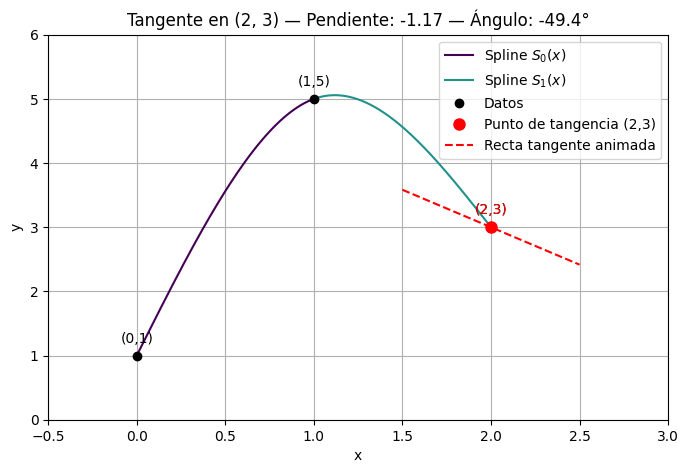

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# ---- FUNCIÓN SPLINE CÚBICO ----
def cubic_spline(xs: list[float], ys: list[float]):
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]
    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])
    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    a = ys
    splines = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        xj = xs[j]
        S = a[j] + b * (x - xj) + c[j] * (x - xj)**2 + d * (x - xj)**3
        splines.append(S)
    splines.reverse()
    return splines, xs, ys

# ---- DATOS DEL PROBLEMA ----
xs = [0, 1, 2]
ys = [1, 5, 3]
splines, sorted_xs, sorted_ys = cubic_spline(xs, ys)

# Spline correspondiente al intervalo [1,2] (índice 1)
x = sym.Symbol("x")
spline_to_animate = splines[1]
spline_f = sym.lambdify(x, spline_to_animate, modules=["numpy"])

# Derivada de la spline para pendiente real
spline_prime = sym.diff(spline_to_animate, x)
spline_prime_f = sym.lambdify(x, spline_prime, modules=["numpy"])

# Punto fijo de tangencia (2, 3)
x0 = 2
y0 = 3 

true_slope = spline_prime_f(x0)

# Animación de pendiente de 0 hasta true_slope
n_frames = 100
slopes = np.linspace(0, true_slope, n_frames)

# ---- GRÁFICO ----
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar todos los splines
for i, s in enumerate(splines):
    x_vals = np.linspace(sorted_xs[i], sorted_xs[i+1], 200)
    spline_func = sym.lambdify(x, s, modules=["numpy"])
    y_vals = spline_func(x_vals)
    ax.plot(x_vals, y_vals, label=f"Spline $S_{i}(x)$", color=plt.cm.viridis(i/len(splines))) # Use a colormap for different colors

# Puntos de datos originales
ax.plot(xs, ys, 'ko', label="Datos")
for xv, yv in zip(xs, ys):
    ax.text(xv, yv + 0.2, f"({xv},{yv})", ha='center')

# Punto de tangencia (2,3)
ax.plot(x0, y0, 'ro', markersize=8, label=f"Punto de tangencia ({x0},{y0})")
ax.text(x0, y0 + 0.2, f"({x0},{y0})", ha='center', color='red')

# Recta tangente inicial
tangent_line, = ax.plot([], [], 'r--', label="Recta tangente animada")

# Título dinámico
title = ax.set_title("")

# Configuración
ax.set_xlim(0 - 0.5, 2.5 + 0.5) # Ajuste de límites para mejor visualización
ax.set_ylim(0, 6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid(True)

# ---- ANIMACIÓN ----
def animate(i):
    slope = slopes[i]
    # Recta tangente: y = m(x - x0) + y0
    x_tangent = np.linspace(x0 - 0.5, x0 + 0.5, 100) # Se extiende un poco alrededor de x0
    y_tangent = slope * (x_tangent - x0) + y0
    tangent_line.set_data(x_tangent, y_tangent)

    angle_rad = np.arctan(slope)
    angle_deg = np.rad2deg(angle_rad)
    title.set_text(f"Tangente en ({x0}, {y0}) — Pendiente: {slope:.2f} — Ángulo: {angle_deg:.1f}°")

    # Mostrar la animación en Jupyter
    clear_output(wait=True)
    display(fig)

# Crear la animación en Jupyter
for i in range(n_frames):
    animate(i)
    plt.pause(0.05) # Pausa para actualizar la figura

plt.close(fig) # Cerrar la figura al finalizar la animación

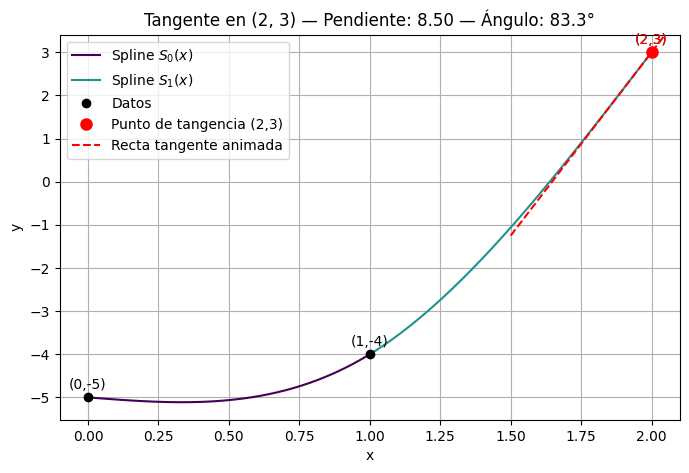

In [3]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# ---- FUNCIÓN SPLINE CÚBICO ----
def cubic_spline(xs: list[float], ys: list[float]):
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]
    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])
    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    a = ys
    splines = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        xj = xs[j]
        S = a[j] + b * (x - xj) + c[j] * (x - xj)**2 + d * (x - xj)**3
        splines.append(S)
    splines.reverse()
    return splines, xs, ys

# ---- DATOS DEL PROBLEMA ----
xs = [0, 1, 2]
ys = [-5, -4, 3]
splines, sorted_xs, sorted_ys = cubic_spline(xs, ys)

# Spline correspondiente al intervalo [1,2] (índice 1)
x = sym.Symbol("x")
spline_to_animate = splines[1]
spline_f = sym.lambdify(x, spline_to_animate, modules=["numpy"])

# Derivada de la spline para pendiente real
spline_prime = sym.diff(spline_to_animate, x)
spline_prime_f = sym.lambdify(x, spline_prime, modules=["numpy"])

# Punto fijo de tangencia (2, 3)
x0 = 2
y0 = 3 

true_slope = spline_prime_f(x0)

# Animación de pendiente de 0 hasta true_slope
n_frames = 100
slopes = np.linspace(0, true_slope, n_frames)

# ---- GRÁFICO ----
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar todos los splines
for i, s in enumerate(splines):
    x_vals = np.linspace(sorted_xs[i], sorted_xs[i+1], 200)
    spline_func = sym.lambdify(x, s, modules=["numpy"])
    y_vals = spline_func(x_vals)
    ax.plot(x_vals, y_vals, label=f"Spline $S_{i}(x)$", color=plt.cm.viridis(i/len(splines))) # Use a colormap for different colors

# Puntos de datos originales
ax.plot(xs, ys, 'ko', label="Datos")
for xv, yv in zip(xs, ys):
    ax.text(xv, yv + 0.2, f"({xv},{yv})", ha='center')

# Punto de tangencia (2,3)
ax.plot(x0, y0, 'ro', markersize=8, label=f"Punto de tangencia ({x0},{y0})")
ax.text(x0, y0 + 0.2, f"({x0},{y0})", ha='center', color='red')

# Recta tangente inicial
tangent_line, = ax.plot([], [], 'r--', label="Recta tangente animada")

# Título dinámico
title = ax.set_title("")

# Configuración
#ax.set_xlim(0 - 0.5, 2.5 + 0.5) # Ajuste de límites para mejor visualización
#ax.set_ylim(0, 6)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid(True)

# ---- ANIMACIÓN ----
def animate(i):
    slope = slopes[i]
    # Recta tangente: y = m(x - x0) + y0
    x_tangent = np.linspace(x0 - 0.5, x0 + 0.5, 100) # Se extiende un poco alrededor de x0
    y_tangent = slope * (x_tangent - x0) + y0
    tangent_line.set_data(x_tangent, y_tangent)

    angle_rad = np.arctan(slope)
    angle_deg = np.rad2deg(angle_rad)
    title.set_text(f"Tangente en ({x0}, {y0}) — Pendiente: {slope:.2f} — Ángulo: {angle_deg:.1f}°")

    # Mostrar la animación en Jupyter
    clear_output(wait=True)
    display(fig)

# Crear la animación en Jupyter
for i in range(n_frames):
    animate(i)
    plt.pause(0.05) # Pausa para actualizar la figura

plt.close(fig) # Cerrar la figura al finalizar la animación

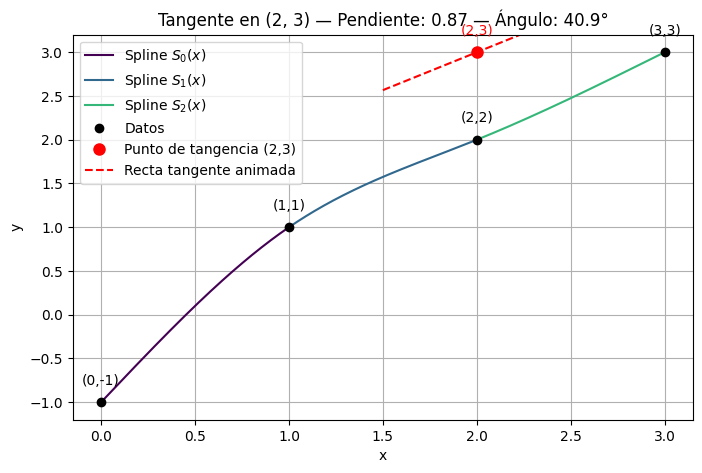

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# ---- FUNCIÓN SPLINE CÚBICO ----
def cubic_spline(xs: list[float], ys: list[float]):
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]
    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])
    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    a = ys
    splines = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        xj = xs[j]
        S = a[j] + b * (x - xj) + c[j] * (x - xj)**2 + d * (x - xj)**3
        splines.append(S)
    splines.reverse()
    return splines, xs, ys

# ---- DATOS DEL PROBLEMA ----
xs = [0, 1, 2, 3]
ys = [-1, 1, 2, 3]
splines, sorted_xs, sorted_ys = cubic_spline(xs, ys)

# Spline correspondiente al intervalo [1,2] (índice 1)
x = sym.Symbol("x")
spline_to_animate = splines[1]
spline_f = sym.lambdify(x, spline_to_animate, modules=["numpy"])

# Derivada de la spline para pendiente real
spline_prime = sym.diff(spline_to_animate, x)
spline_prime_f = sym.lambdify(x, spline_prime, modules=["numpy"])

# Punto fijo de tangencia (2, 3)
x0 = 2
y0 = 3 

true_slope = spline_prime_f(x0)

# Animación de pendiente de 0 hasta true_slope
n_frames = 100
slopes = np.linspace(0, true_slope, n_frames)

# ---- GRÁFICO ----
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar todos los splines
for i, s in enumerate(splines):
    x_vals = np.linspace(sorted_xs[i], sorted_xs[i+1], 200)
    spline_func = sym.lambdify(x, s, modules=["numpy"])
    y_vals = spline_func(x_vals)
    ax.plot(x_vals, y_vals, label=f"Spline $S_{i}(x)$", color=plt.cm.viridis(i/len(splines))) # Use a colormap for different colors

# Puntos de datos originales
ax.plot(xs, ys, 'ko', label="Datos")
for xv, yv in zip(xs, ys):
    ax.text(xv, yv + 0.2, f"({xv},{yv})", ha='center')

# Punto de tangencia (2,3)
ax.plot(x0, y0, 'ro', markersize=8, label=f"Punto de tangencia ({x0},{y0})")
ax.text(x0, y0 + 0.2, f"({x0},{y0})", ha='center', color='red')

# Recta tangente inicial
tangent_line, = ax.plot([], [], 'r--', label="Recta tangente animada")

# Título dinámico
title = ax.set_title("")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.grid(True)

# ---- ANIMACIÓN ----
def animate(i):
    slope = slopes[i]
    x_tangent = np.linspace(x0 - 0.5, x0 + 0.5, 100) # Se extiende un poco alrededor de x0
    y_tangent = slope * (x_tangent - x0) + y0
    tangent_line.set_data(x_tangent, y_tangent)

    angle_rad = np.arctan(slope)
    angle_deg = np.rad2deg(angle_rad)
    title.set_text(f"Tangente en ({x0}, {y0}) — Pendiente: {slope:.2f} — Ángulo: {angle_deg:.1f}°")

    # Mostrar la animación en Jupyter
    clear_output(wait=True)
    display(fig)

# Crear la animación en Jupyter
for i in range(n_frames):
    animate(i)
    plt.pause(0.05) # Pausa para actualizar la figura

plt.close(fig) # Cerrar la figura al finalizar la animación